# Student Performance Analysis: Exploratory Data Analysis

## 📊 Executive Summary

This notebook performs comprehensive exploratory data analysis (EDA) on a student performance dataset combining Mathematics and Portuguese course data from a Portuguese secondary school. The analysis identifies key risk factors predicting student academic performance and prepares data for predictive modeling.

### 🎯 Objectives
- **Merge datasets** from two subjects (Math & Portuguese) on shared student demographics
- **Clean and validate** data for quality and integrity
- **Engineer features** that capture meaningful patterns in student behavior and background
- **Identify predictors** of student academic risk (grades < 10)
- **Prepare master datasets** for team collaboration on clustering and classification tasks

### 📈 Key Findings

#### **Dataset Overview**
- **Total Students Analyzed:** 382 (students present in both Math and Portuguese courses)
- **Total Features:** 76 (after encoding) across two versions
- **Target Variable:** Final grades (G3_x for Math, G3_y for Portuguese)
- **At-Risk Definition:** Final grade < 10

#### **Top Risk Predictors (Correlation with Final Grades)**

| **Feature** | **Math Correlation** | **Portuguese Correlation** | **Strength** |
|------------|----------------------|---------------------------|------------|
| **Prior Grades (G2)** | 0.90 | 0.89 | 🔴 Very Strong |
| **Prior Grades (G1)** | 0.81 | 0.82 | 🔴 Very Strong |
| **Past Failures** | -0.38 | -0.34 | 🟠 Strong Negative |
| **Study Time** | 0.27 | 0.28 | 🟡 Moderate |
| **Parental Education** | 0.20 | 0.21 | 🟡 Moderate |
| **Alcohol Use** | -0.04

#### **Subject-Specific Insights**

**Math Performance is primarily driven by:**
- Prior academic performance (G1, G2)
- History of academic failures
- Study time and parental education

**Portuguese Performance is more sensitive to:**
- Behavioral factors (alcohol consumption, study time)
- Socioeconomic factors (parental education)
- Study habits (study time shows stronger effect)

### 🔴 At-Risk Student Distribution
- **Math At-Risk:** 127 students (33%)
- **Portuguese At-Risk:** 97 students (25%)
- **Both Subjects At-Risk:** 41 students (11%)
- **Neither At-Risk:** 255 students (67%)

### 🛠️ Data Processing Steps

1. **Merging:** Combined Math and Portuguese datasets on 13 invariant features (school, sex, age, etc.)
2. **Cleaning:** Removed outliers (absences capped at 95th percentile)
3. **Feature Engineering:** Created 9 new features aggregating behavioral and socioeconomic factors
4. **Encoding:** One-hot encoded all categorical variables
5. **Validation:** Ensured 100% data completeness (no missing values)

### 📊 Output Datasets

Two master datasets created for team modeling:

| **Dataset** | **With Prior Grades** | **Without Prior Grades** |
|------------|----------------------|-------------------------|
| **File** | `student_with_grades_encoded.csv` | `student_without_grades_encoded.csv` |
| **Rows** | 382 | 382 |
| **Columns** | 76 | 72 |
| **Use Case** | Best-case predictions (all data available) | Early prediction (beginning of year) |
| **Users** | K-Means, RF Classifier, RF Regressor | All models for comparison |

### 🎯 Recommendations for Modeling

1. **K-Means Clustering:** Use engineered features and at-risk labels to identify student clusters
2. **RF Classification:** Predict at-risk status; compare Math vs Portuguese models
3. **RF Regression:** Predict final grades; analyze feature importance
4. **Model Comparison:** Run all models on both datasets to measure impact of prior grades

### 📌 Key Methodological Decisions

- **Outlier Capping:** Only absences (highest variance) were capped; grades retained (valid distribution)
- **Feature Pooling:** Rare categories (<5%) pooled into 'Other' to reduce sparsity
- **Missing Data:** None detected after merging (inner join on shared students)
- **Target Threshold:** G3 < 10 defined as at-risk (aligns with failing grade convention)

---

### 📖 Next Steps
1. Review master datasets: `student_with_grades_encoded.csv` and `student_without_grades_encoded.csv`
2. Compare results across all models using consistent evaluation metrics

### **Evaluation Framework for models**

**For Clustering (K-Means):**
- Silhouette score
- Cluster homogeneity (within-cluster variance)
- Alignment with at-risk labels (for interpretability)

**For Classification (RF):**
- Accuracy, Precision, Recall, F1-Score
- ROC-AUC (handles class imbalance)
- Feature importance

**For Regression (RF):**
- RMSE, MAE, R²
- Cross-validation score
- Feature importance

**Dataset Created:** 2025-11-14  
**Total Analysis Time:** EDA Complete | Ready for Modeling Phase

---

## DATA PRE PROCESSING

# Load libraries and import datasets

In [120]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

In [121]:
students_port = pd.read_csv('student-por.csv', sep=';', quotechar='"')

print(students_port.head()) 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [122]:
students_math=pd.read_csv('student-mat.csv',sep=';')
print(students_math.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [123]:
#Check the structure and summary of the datasets before merging them together
print(students_math.info())
print(students_port.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [124]:
print(students_math.describe())
print(students_port.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

# Note found on readme for data sets:
> _Additional note:_ there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student

In [125]:
#Merge datasets on attribute "invariant" columns to only keep the same students present in both datasets
student_merged=pd.merge(students_math, students_port, how='inner', on=['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [126]:
student_merged.to_csv('student_merged.csv', index=False)

In [127]:
#Confirm there are no missing values in the merged dataset
missing = student_merged.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [128]:
# Convert appropriate columns
generic_cats = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian_x', 'guardian_y', 'schoolsup_x', 'schoolsup_y', 'famsup_x', 'famsup_y', 'paid_x', 'paid_y', 'activities_x', 'activities_y', 'nursery', 'higher_x', 'higher_y', 'internet', 'romantic_x', 'romantic_y']
for col in generic_cats:
    if col in student_merged.columns:
        student_merged[col] = student_merged[col].astype('category')
print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   school        382 non-null    category
 1   sex           382 non-null    category
 2   age           382 non-null    int64   
 3   address       382 non-null    category
 4   famsize       382 non-null    category
 5   Pstatus       382 non-null    category
 6   Medu          382 non-null    int64   
 7   Fedu          382 non-null    int64   
 8   Mjob          382 non-null    category
 9   Fjob          382 non-null    category
 10  reason        382 non-null    category
 11  guardian_x    382 non-null    category
 12  traveltime_x  382 non-null    int64   
 13  studytime_x   382 non-null    int64   
 14  failures_x    382 non-null    int64   
 15  schoolsup_x   382 non-null    category
 16  famsup_x      382 non-null    category
 17  paid_x        382 non-null    category
 18  activities

In [129]:
#Find outliers for numeric values
numeric_cols = student_merged.select_dtypes(include=['int64', 'float64']).columns
# Calculate the range (maximum - minimum) for each numeric variable
range_values = student_merged[numeric_cols].max() - student_merged[numeric_cols].min()
print("Range of each numeric variable:\n", range_values)


# Calculate the variance for each numeric variable
variance_values = student_merged[numeric_cols].var()
print("\nVariance of each numeric variable:\n", variance_values)


Range of each numeric variable:
 age              7
Medu             4
Fedu             4
traveltime_x     3
studytime_x      3
failures_x       3
famrel_x         4
freetime_x       4
goout_x          4
Dalc_x           4
Walc_x           4
health_x         4
absences_x      75
G1_x            16
G2_x            19
G3_x            20
traveltime_y     3
studytime_y      3
failures_y       3
famrel_y         4
freetime_y       4
goout_y          4
Dalc_y           4
Walc_y           4
health_y         4
absences_y      32
G1_y            19
G2_y            14
G3_y            19
dtype: int64

Variance of each numeric variable:
 age              1.377032
Medu             1.180223
Fedu             1.201742
traveltime_x     0.483551
studytime_x      0.715374
failures_x       0.532142
famrel_x         0.849384
freetime_x       0.976605
goout_x          1.281259
Dalc_x           0.785402
Walc_x           1.645745
health_x         1.961008
absences_x      58.144453
G1_x            11.216920
G2

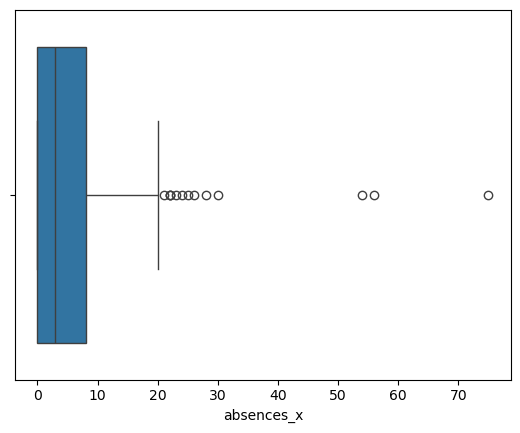

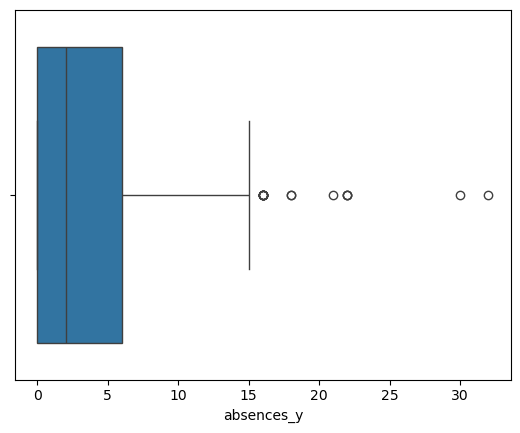

In [130]:
#Check outliers in numeric columns with highest variance, besides grades
plt.figure(); sns.boxplot(x=student_merged['absences_x']); plt.show()
plt.figure(); sns.boxplot(x=student_merged['absences_y']); plt.show()


In [131]:
# Cap values of 'absences_x' and 'absences_y' at their 95th percentile to reduce the effect of outliers
cap_value_x = student_merged['absences_x'].quantile(0.95)
cap_value_y = student_merged['absences_y'].quantile(0.95)

student_merged['absences_x'] = student_merged['absences_x'].clip(upper=cap_value_x)
student_merged['absences_y'] = student_merged['absences_y'].clip(upper=cap_value_y)

In [132]:
all_columns = student_merged.columns

# Identify categorical columns by excluding numeric columns
categorical_cols = all_columns.difference(numeric_cols)
print(categorical_cols)


Index(['Fjob', 'Mjob', 'Pstatus', 'activities_x', 'activities_y', 'address',
       'famsize', 'famsup_x', 'famsup_y', 'guardian_x', 'guardian_y',
       'higher_x', 'higher_y', 'internet', 'nursery', 'paid_x', 'paid_y',
       'reason', 'romantic_x', 'romantic_y', 'school', 'schoolsup_x',
       'schoolsup_y', 'sex'],
      dtype='object')


In [133]:
#Pool rare cateogories into 'Other' for categorical columns with many unique values before encoding
student_merged['Fjob'] = student_merged['Fjob'].str.lower()

for col in categorical_cols:
    if col in student_merged.columns:
        value_counts = student_merged[col].value_counts(normalize=True)
        rare_categories = value_counts[value_counts < 0.05].index
        student_merged[col] = student_merged[col].replace(rare_categories, 'Other')
        student_merged[col] = student_merged[col].astype('category')
print(student_merged[categorical_cols].nunique())

Fjob            4
Mjob            5
Pstatus         2
activities_x    2
activities_y    2
address         2
famsize         2
famsup_x        2
famsup_y        2
guardian_x      3
guardian_y      3
higher_x        2
higher_y        2
internet        2
nursery         2
paid_x          2
paid_y          2
reason          4
romantic_x      2
romantic_y      2
school          2
schoolsup_x     2
schoolsup_y     2
sex             2
dtype: int64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3037695928.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  student_merged[col] = student_merged[col].replace(rare_categories, 'Other')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3037695928.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  student_merged[col] = student_merged[col].replace(rare_categories, 'Other')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3037695928.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, 

In [134]:
#This reduces the number of unique categories per column, resulting in the more manageable category counts
print(student_merged['Fjob'].value_counts())
print(student_merged['Mjob'].value_counts())
print(student_merged['reason'].value_counts())


Fjob
other       211
services    107
Other        33
teacher      31
Name: count, dtype: int64
Mjob
other       138
services     96
teacher      62
at_home      53
health       33
Name: count, dtype: int64
reason
course        140
home          110
reputation     98
other          34
Name: count, dtype: int64


##  Note: 
## Use student_merged for all EDA and visualization (with readable categorical variables).

## Use student_merged_encoded for modeling only (when done visualizing).

In [135]:
#Check for inconsistencies in responses from the same students in both datasets to check if columns can be merged into one

#Check for inconsistencies in 'guardian' (Guardian)
is_guardian_same = (student_merged['guardian_x'] == student_merged['guardian_y']).all()
print(f"Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  {is_guardian_same}")

#Check for inconsistencies in 'Dalc' (Alcohol consumption during weekdays)
is_dalc_same = (student_merged['Dalc_x'] == student_merged['Dalc_y']).all()
print(f"Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  {is_dalc_same}")

#Count number of rows where 'guardian' and 'Dalc' differ
guardian_diff = (student_merged['guardian_x'] != student_merged['guardian_y']).sum()
dalc_diff = (student_merged['Dalc_x'] != student_merged['Dalc_y']).sum()
print(f"Number of rows where 'guardian' is different: {guardian_diff}")
print(f"Number of rows where 'Dalc' is different: {dalc_diff}")

Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  False
Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  False
Number of rows where 'guardian' is different: 6
Number of rows where 'Dalc' is different: 5


## Students report different things for each survey, columns cannot be merged. Each columns will be treated separetely

#  FEATURE ENGINEERING

# Identify at _risk students_

In [136]:
# we have 'at_risk_math' and at_risk_port' as our target variables (G3_x and G3_y for final grades in math and portuguese respectively)
#G3 - final grade (numeric: from 0 to 20) if less than 10 - at risk of failing

# Condition: Is student_merged['G3_x'] < 10?
# If True:  set value to 1 (At Risk)
# If False: set value to 0 (Not At Risk)

student_merged['at_risk_math'] = np.where(student_merged['G3_x'] < 10, 1, 0)
student_merged['at_risk_port'] = np.where(student_merged['G3_y'] < 10, 1, 0)

# Combine 'at_risk_total' column for visualization

def set_at_risk_total(row):
    if row['at_risk_math'] == 1 and row['at_risk_port'] == 1:
        return 'At Risk (Both)'
    elif row['at_risk_math'] == 1:
        return 'At Risk (Math Only)'
    elif row['at_risk_port'] == 1:
        return 'At Risk (Port Only)'
    else:
        return 'Not At Risk'

student_merged['at_risk_total'] = student_merged.apply(set_at_risk_total, axis=1)


print("\n--- Target Variable Creation ---")
print("Breakdown of 'at_risk_math':")
print(student_merged['at_risk_math'].value_counts())

print("\nBreakdown of 'at_risk_port':")
print(student_merged['at_risk_port'].value_counts())

print("\nBreakdown of 'at_risk_total':")
print(student_merged['at_risk_total'].value_counts())


--- Target Variable Creation ---
Breakdown of 'at_risk_math':
at_risk_math
0    255
1    127
Name: count, dtype: int64

Breakdown of 'at_risk_port':
at_risk_port
0    350
1     32
Name: count, dtype: int64

Breakdown of 'at_risk_total':
at_risk_total
Not At Risk            246
At Risk (Math Only)    104
At Risk (Both)          23
At Risk (Port Only)      9
Name: count, dtype: int64


## Create _new engineered features for visualization and modeling_ 

In [137]:
#New engineered features such as total absences, total failures, mean parent education level, average study time, family support indicator, alcohol comsumption average, 
# internet access, encode addres for Urban or Rural, school support indicator

student_merged['total_absences'] = student_merged['absences_x'] + student_merged['absences_y']  #Captures overall absenteeism, which often predicts risk.
student_merged['total_failures'] = student_merged['failures_x'] + student_merged['failures_y']  #Reflects history of academic struggles.
student_merged['mean_parent_edu'] = (student_merged['Medu'] + student_merged['Fedu']) / 2   #Aggregates parental education
student_merged['avg_study_time'] = (student_merged['studytime_x'] + student_merged['studytime_y']) / 2  #Combines time spent studying for both subjects.
student_merged['family_support'] = np.where((student_merged['famsup_x'] == 'yes') | (student_merged['famsup_y'] == 'yes'), 1, 0)    #Binary indicator for extra support in either subject.
student_merged['avg_alcohol_consumption'] = (student_merged['Dalc_x'] + student_merged['Dalc_y']) / 2  #Highlights risk behaviors via daily alcohol use
student_merged['internet_access'] = np.where(student_merged['internet'] == 'yes', 1, 0)  #Binary indicator for internet access at home
student_merged['urban_rural'] = np.where(student_merged['address'] == 'U', 1, 0)  #Encode address for Urban (1) or Rural (0)
student_merged['school_support'] = np.where((student_merged['schoolsup_x'] == 'yes') | (student_merged['schoolsup_y'] == 'yes'), 1, 0)  #Binary indicator for extra school support in either subject

print("\n--- New Engineered Features ---")
print(student_merged[['total_absences', 'total_failures', 'mean_parent_edu', 'avg_study_time', 'family_support', 'avg_alcohol_consumption', 'internet_access', 'urban_rural', 'school_support']].head())


#Check for missing values after feature engineering
print(student_merged.isnull().sum())



--- New Engineered Features ---
   total_absences  total_failures  mean_parent_edu  avg_study_time  \
0            10.0               0              4.0             2.0   
1             6.0               0              1.0             2.0   
2            16.0               3              1.0             2.0   
3             2.0               0              3.0             3.0   
4             4.0               0              3.0             2.0   

   family_support  avg_alcohol_consumption  internet_access  urban_rural  \
0               0                      1.0                0            1   
1               1                      1.0                1            1   
2               0                      2.0                1            1   
3               1                      1.0                1            1   
4               1                      1.0                0            1   

   school_support  
0               1  
1               0  
2               1  
3        

## Create full, ready for visualization dataset

In [138]:
# These are the columns used to merge. They are the 'invariant' attributes.
invariant_features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

# These are the 'variant' attributes related to the Math class (_x)
math_features = [
    'guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x',
    'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x',
    'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x'
]

# These are the 'variant' attributes related to the Portuguese class (_y)
port_features = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y',
    'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
    'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y'
]

# Engineered features (aggregated/combined features)
engineered_features = [
    'total_absences', 'total_failures', 'mean_parent_edu', 'avg_study_time',
    'family_support', 'avg_alcohol_consumption', 'internet_access',
    'urban_rural', 'school_support'
]

# These are the grade and target columns
target_features = [
    'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y',
    'at_risk_math', 'at_risk_port', 'at_risk_total'
]

print("\n--- Feature Lists Created ---")
print(f"Invariant Features ({len(invariant_features)}): {invariant_features}")
print(f"Math-Specific Features ({len(math_features)}): {math_features}")
print(f"Portuguese-Specific Features ({len(port_features)}): {port_features}")
print(f"Engineered Features ({len(engineered_features)}): {engineered_features}")
print(f"Target Features ({len(target_features)}): {target_features}")


--- Feature Lists Created ---
Invariant Features (13): ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
Math-Specific Features (17): ['guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x', 'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x']
Portuguese-Specific Features (17): ['guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y']
Engineered Features (9): ['total_absences', 'total_failures', 'mean_parent_edu', 'avg_study_time', 'family_support', 'avg_alcohol_consumption', 'internet_access', 'urban_rural', 'school_support']
Target Features (9): ['G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y', 'at_risk_math', 'at_risk_port', 'at_risk_total'

In [139]:
#create full, ready for visualization dataset
student_merged.to_csv('student_visual.csv', index=False)
print("Full dataset for visualization saved as 'student_visual.csv'.")
print(student_merged.head())

Full dataset for visualization saved as 'student_visual.csv'.
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

         at_risk_total total_absences  total_failures  mean_parent_edu  \
0  At Risk (Math Only)           10.0               0              4.0   
1  At Risk (Math Only)            6.0               0              1.0   
2          Not At Risk           16.0               3              1.0   
3          Not At Risk            2.0               0              3.0   
4          Not At Risk            4.0               0              3.0   

   avg

# **Data Visualization**

# Note: I re run the heatmap using only the features from student_merged and not from the encoded data frame since correlation only works with numeric data anyway. I also addede the new engineered features to the heatmap and prior grades.

Text(0.5, 124.72222222222219, 'Grades')

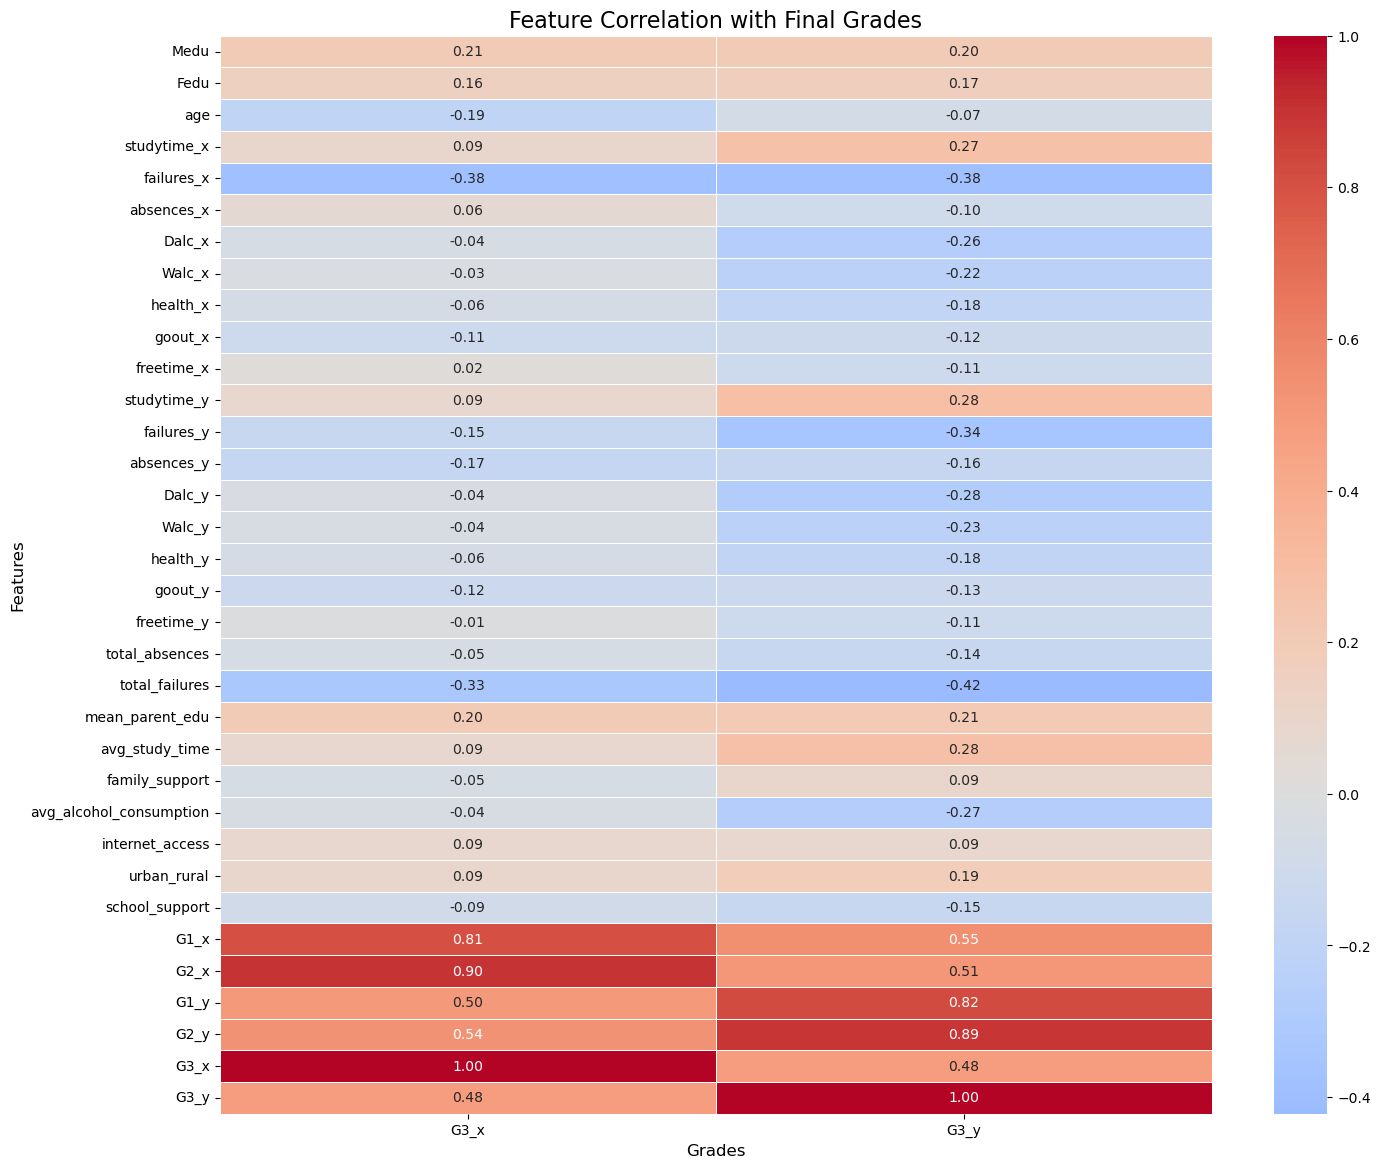

In [140]:
#Draw a heatmap to visualize the correlation of invariant and variant features with final grades
# Select key features: invariant, variant, engineered features and targets
invariant_features_sel = ['Medu', 'Fedu', 'age']  # Keep numeric only for correlation
variant_features_x_sel = ['studytime_x', 'failures_x', 'absences_x', 'Dalc_x', 'Walc_x', 'health_x', 'goout_x', 'freetime_x']
variant_features_y_sel = ['studytime_y', 'failures_y', 'absences_y', 'Dalc_y', 'Walc_y', 'health_y', 'goout_y', 'freetime_y']
engineered_features_sel = ['total_absences', 'total_failures', 'mean_parent_edu', 'avg_study_time',
                           'family_support', 'avg_alcohol_consumption', 'internet_access',
                           'urban_rural', 'school_support']
prior_grades = ['G1_x', 'G2_x', 'G1_y', 'G2_y']
targets = ['G3_x', 'G3_y'] # G3_mat and G3_por

features_for_corr = invariant_features_sel + variant_features_x_sel + variant_features_y_sel + engineered_features_sel + prior_grades + targets
df_corr = student_merged[features_for_corr]
# Calculate the correlation matrix
corr_matrix = df_corr.corr()
corr_with_targets = corr_matrix[targets]

plt.figure(figsize=(16,14))
# Draw the heatmap
sns.heatmap(
    corr_with_targets,       # Correlations of features with G3_x and G3_y
    annot=True,              # Show correlation values
    fmt=".2f",
    cmap="coolwarm",         # Color map for positive/negative correlation
    center=0,                # Center at 0 (neutral correlation)
    linewidths=0.5
)
plt.title("Feature Correlation with Final Grades", fontsize=16)
plt.ylabel("Features", fontsize=12)
plt.xlabel("Grades", fontsize=12)

Heatmap interpretation: 
Strongest Positive Correlations (Good predictors of higher grades)
1. Study Time (0.27 for Math, 0.28 for Portuguese). Consistent positive effect across both subjects
2. Parental Education (0.20-0.21 for both subjects). Family educational background matters for academic performance
3. Urban vs Rural (0.09 for Math, 0.19 for Portuguese) Students in urban areas tend to perform slightly better, especially in Portuguese
4. Of course prior grades have the strongest correlations with final grades and are critical for understanding predictive power.

Strongest Negative Correlations (Risk factors for lower grades)
1. Failures (Most significant predictor). Past failures are the strongest predictor of poor current performance
2. Alcohol Consumption.  Alcohol use correlates with lower grades, especially in Portuguese
3. Age (-0.19 for Math, -0.07 for Portuguese). Older students tend to have slightly lower math grades (possibly due to grade repetition)

Weak/No Correlation (Less important)
1. Absences (-0.05 to -0.17): Surprisingly weak—less impactful than expected
2. Health (-0.06 to -0.18): Minor negative correlation
3. Free time (-0.01 to -0.11): Almost no correlation
4. Family/School Support (-0.05 to 0.09): Very weak correlations—support alone doesn't guarantee better grades

Cross-Subject Correlation
1. G3_x and G3_y: 0.48—moderate positive correlation. Students who do well in Math tend to do reasonably well in Portuguese, but not perfectly

# **Basic stats and plots**

*Average grades by school* (remove? not sure if comparing schools is part of our analysis)
Why: Statistical rigor with t-test; shows institutional differences

average final grades for math per school
['GP' 'MS']
school
GP    10.494152
MS     9.475000
Name: G3_x, dtype: float64
T-statistic: 1.307, P-value: 0.197


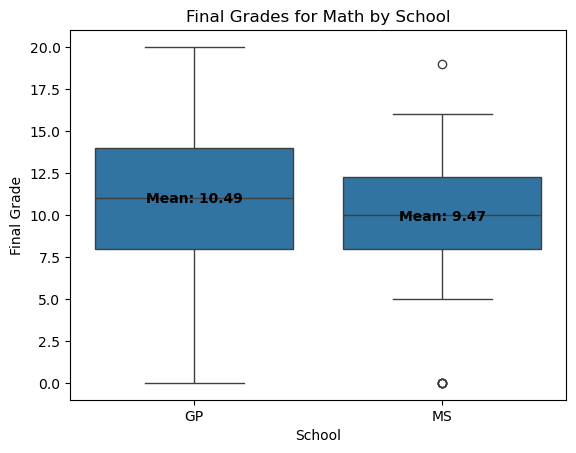

average final grades for Portuguese per school
school
GP    12.69883
MS    10.95000
Name: G3_y, dtype: float64
T-statistic: 2.316, P-value: 0.025


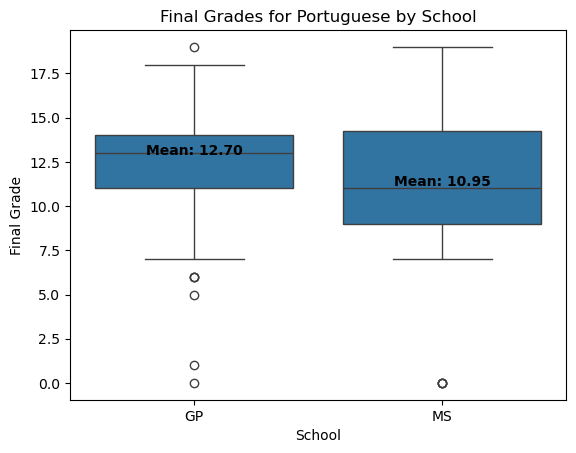

In [141]:
from scipy import stats
#average student performance by school to analynse any variances
students_all = pd.read_csv("student_visual.csv")
print("average final grades for math per school")
print(students_all['school'].unique())

# Group means by school for math
print(students_all.groupby('school')['G3_x'].mean())
# Compare statistically
school1 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_x']
school2 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_x']
t_stat, p_val = stats.ttest_ind(school1, school2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_x')
means = students_all.groupby('school')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Math by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

# Group means by school for Portuguese
print("average final grades for Portuguese per school")
print(students_all.groupby('school')['G3_y'].mean())
# Compare statistically
school3 = students_all[students_all['school'] == students_all['school'].unique()[0]]['G3_y']
school4 = students_all[students_all['school'] == students_all['school'].unique()[1]]['G3_y']

t_stat, p_val = stats.ttest_ind(school3, school4, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")

# Visualize with Boxplot
sns.boxplot(data=students_all, x='school', y='G3_y')
means = students_all.groupby('school')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')

plt.title('Final Grades for Portuguese by School')
plt.xlabel('School')
plt.ylabel('Final Grade')
plt.show()

interpretation: Overall, GP school has better grades. 
For math the variance is acceptable.
However, for Portuguese the P-value is significant

*Comparision based on gender*
Why: Shows demographic differences in performance

['F' 'M']
sex
F     9.838384
M    10.978261
Name: G3_x, dtype: float64


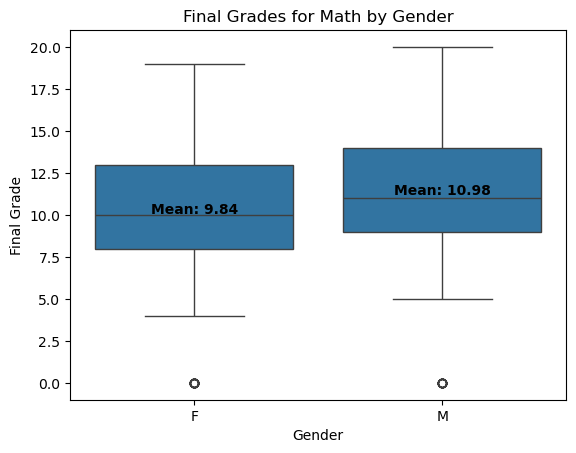

['F' 'M']
sex
F    13.085859
M    11.902174
Name: G3_y, dtype: float64


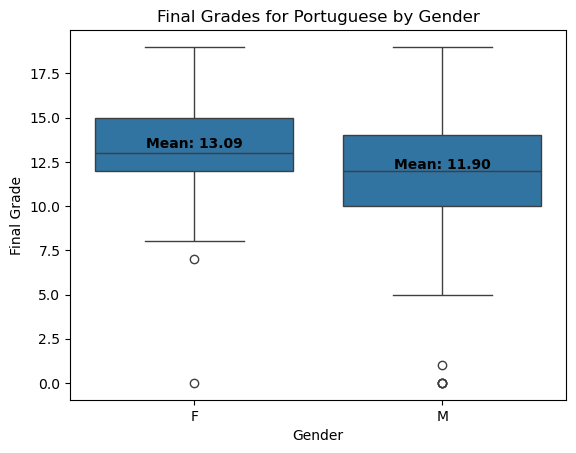

In [142]:
#is the perfromance affected by the gender of the student?
#1. Math
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_x'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_x')
means = students_all.groupby('sex')['G3_x'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Math by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()
#2. Portuguese
print(students_all['sex'].unique())
print(students_all.groupby('sex')['G3_y'].mean())
sns.boxplot(data=students_all, x='sex', y='G3_y')
means = students_all.groupby('sex')['G3_y'].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 0.2, f'Mean: {mean:.2f}', ha='center', color='black', weight='bold')
plt.title('Final Grades for Portuguese by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade')
plt.show()

interpretation: Males perform slightly better in Math while Females perform slightly better in Portugese.

*The relationship between study time and performance*
Why: Moderate positive correlation (0.27-0.28)
Impact: Clear actionable insight (more study time helps)

studytime_x
1    10.097087
2    10.100000
3    11.370968
4    11.259259
Name: G3_x, dtype: float64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2839682628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=students_all, x='studytime_x', y='G3_x', jitter=True, palette='Set2', size=4)


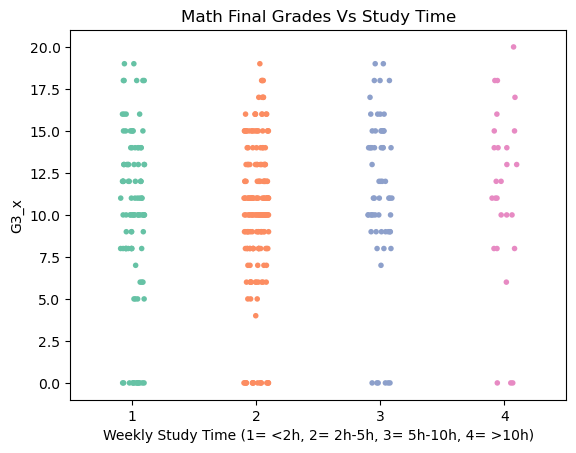

studytime_y
1    11.147059
2    12.694737
3    13.809524
4    13.407407
Name: G3_y, dtype: float64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2839682628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=students_all, x='studytime_y', y='G3_y', jitter=True, palette='Set2', size=4)


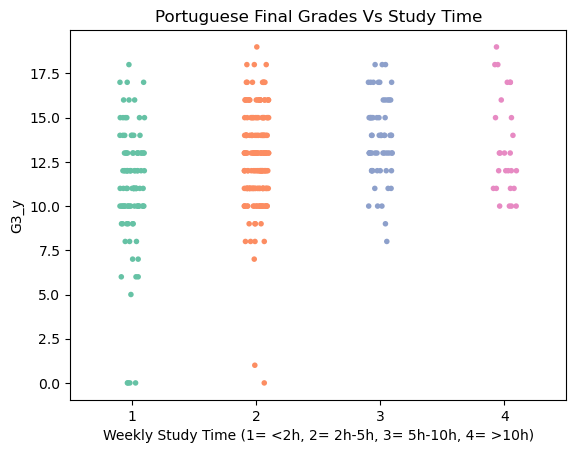

In [143]:
#How does the studytime affect the final grade?
#1. Math
print(students_all.groupby('studytime_x')['G3_x'].mean())
sns.stripplot(data=students_all, x='studytime_x', y='G3_x', jitter=True, palette='Set2', size=4)
plt.title('Math Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_x')
plt.show()
#2. Portuguese
print(students_all.groupby('studytime_y')['G3_y'].mean())
sns.stripplot(data=students_all, x='studytime_y', y='G3_y', jitter=True, palette='Set2', size=4)
plt.title('Portuguese Final Grades Vs Study Time')
plt.xlabel('Weekly Study Time (1= <2h, 2= 2h-5h, 3= 5h-10h, 4= >10h)')
plt.ylabel('G3_y')
plt.show()

Interpretation: Slight increase in final grade with study time

Failures Vs Performance
Why: Heatmap shows failures have strong negative correlation (-0.33 to -0.42)
Impact: Directly supports at-risk identification; shows interaction with study time

The number of students who failed Math
failures_x
0    316
1     38
2     11
3     17
Name: G3_x, dtype: int64
The average grades per number of failures
failures_x
0    11.240506
1     7.078947
2     4.818182
3     5.529412
Name: G3_x, dtype: float64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=students_all, x='failures_x', y='G3_x', palette='pastel', inner=None)
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


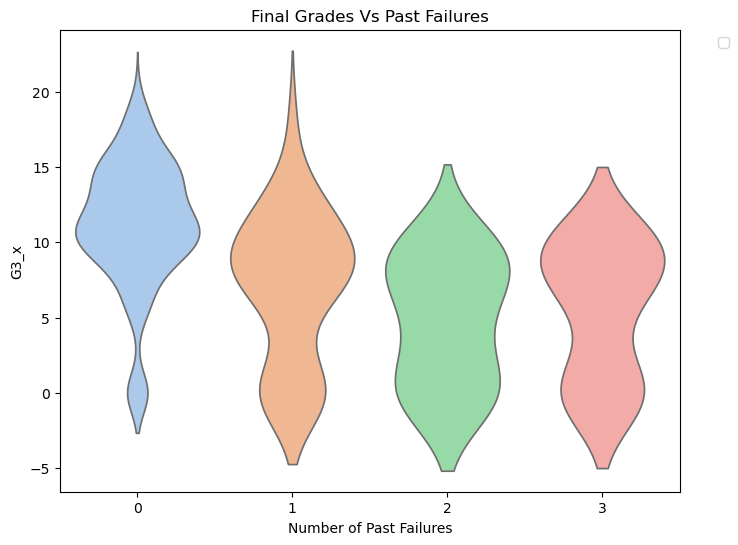

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


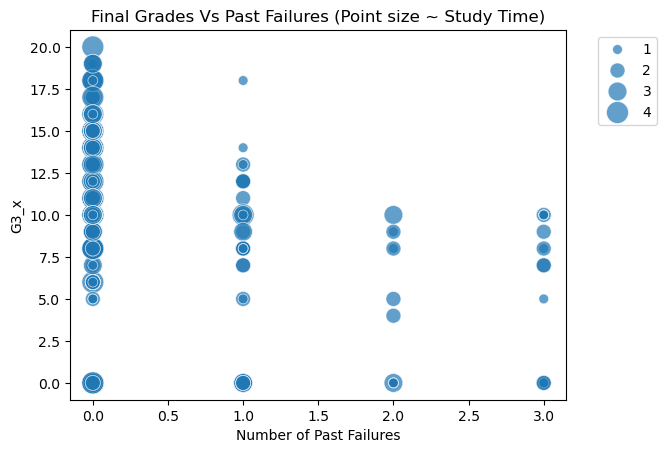

The number of students who failed Portuguese
failures_y
0    348
1     21
2      6
3      7
Name: G3_y, dtype: int64
The average grades per number of failures
failures_y
0    12.867816
1     9.095238
2     8.166667
3     9.000000
Name: G3_y, dtype: float64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=students_all, x='failures_y', y='G3_y', palette='pastel', inner=None)
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


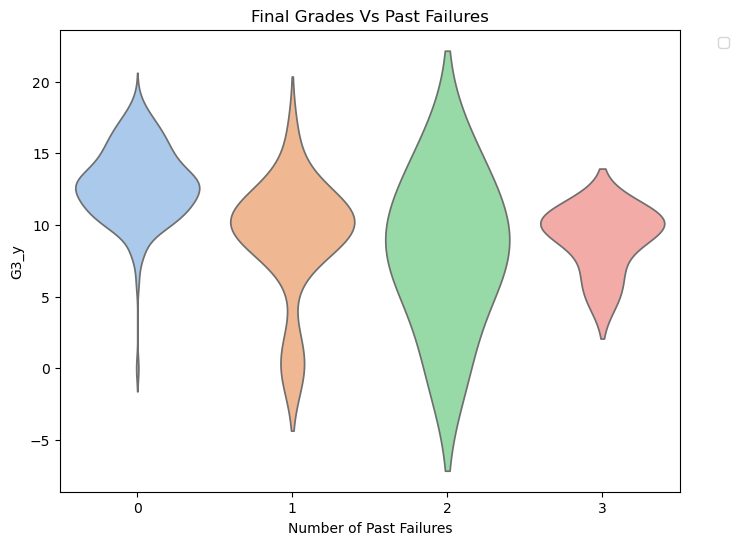

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3312237290.py:45: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


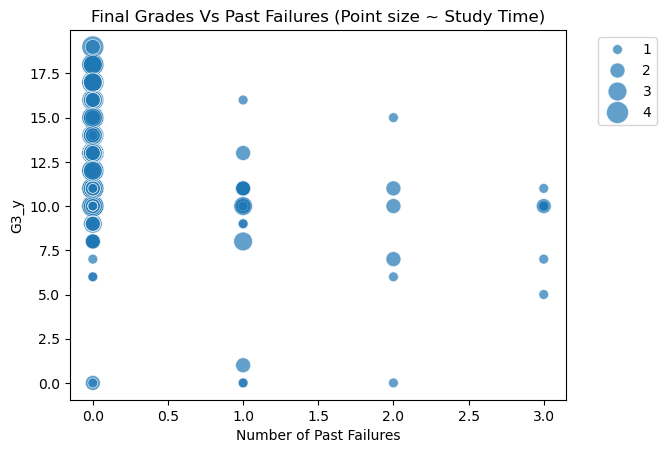

In [144]:
#How does the studytime affect the failure? and how does it affect the final grade in return?
#1. Math
print("The number of students who failed Math")
print(students_all.groupby('failures_x')['G3_x'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_x')['G3_x'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_x', y='G3_x', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_x',
    y='G3_x',
    size='studytime_x',       # variable size per student
    sizes=(50, 250),        # min/max point size
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#2. Portuguese
print("The number of students who failed Portuguese")
print(students_all.groupby('failures_y')['G3_y'].count())
print("The average grades per number of failures")
print(students_all.groupby('failures_y')['G3_y'].mean())
plt.figure(figsize=(8,6))
#violin plot for failures
sns.violinplot(data=students_all, x='failures_y', y='G3_y', palette='pastel', inner=None)
plt.title('Final Grades Vs Past Failures')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#scatter plot where the point size show the studytime
sns.scatterplot(
    data=students_all,
    x='failures_y',
    y='G3_y',
    size='studytime_y',# variable size per student
    sizes=(50, 250),
    palette='Set2',
    alpha=0.7
)
plt.title('Final Grades Vs Past Failures (Point size ~ Study Time)')
plt.xlabel('Number of Past Failures')
plt.ylabel('G3_y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

interpretation: The number of failures has a negative impact on the final grade. However, when the study time increase for these  failures the final grade increases.

*Parents education* Why: Positive correlation (0.20-0.21). Impact: Shows socioeconomic factors matter


Medu
0      3
1     51
2     98
3     95
4    135
Name: G3_x, dtype: int64
Fedu
0      2
1     77
2    105
3     99
4     99
Name: G3_x, dtype: int64


C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\856229432.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long, x='Education', y='G3_x', hue='Parent', palette='pastel', ci='sd')


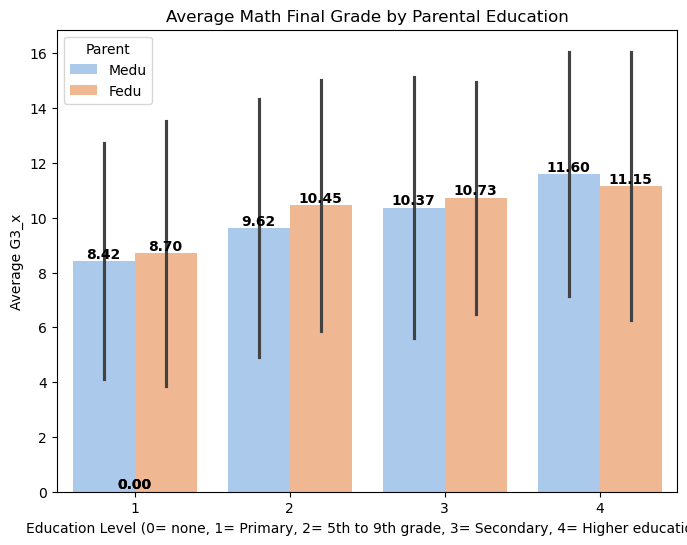

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\856229432.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long2, x='Education', y='G3_y', hue='Parent', palette='pastel', ci='sd')


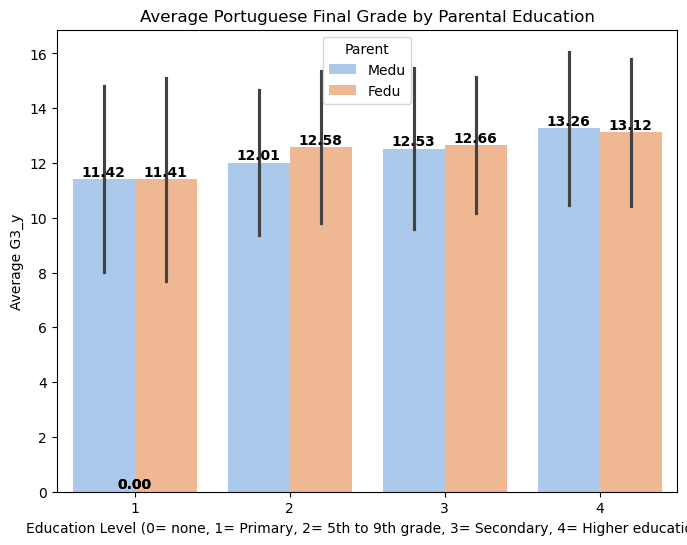

In [145]:
#Does parental education impact the students final grades?
print(students_all.groupby('Medu')['G3_x'].count())
print(students_all.groupby('Fedu')['G3_x'].count())
#this shows us that the number of parents with 0 education is very low which gives false results so we will discard them

#1. Math
parent_df = students_all[['Medu', 'Fedu', 'G3_x']].copy()
parent_df = parent_df[(parent_df['Medu'] > 0) & (parent_df['Fedu'] > 0)]
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Education', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_x")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

#2. Portuguese
parent_df2 = students_all[['Medu', 'Fedu', 'G3_y']].copy()
parent_df2 = parent_df2[(parent_df2['Medu'] > 0) & (parent_df2['Fedu'] > 0)]
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Medu','Fedu'],
                             var_name='Parent', value_name='Education')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Education', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portuguese Final Grade by Parental Education")
plt.xlabel("Education Level (0= none, 1= Primary, 2= 5th to 9th grade, 3= Secondary, 4= Higher education)")
plt.ylabel("Average G3_y")

for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()

Interpretation: Both parents education levels shows a positive impact on the student performance.

*parental job vs performance* (remove? ) Why: Shows some variation, though weaker than education

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3890060346.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long, x='Job', y='G3_x', hue='Parent', palette='pastel', ci='sd')


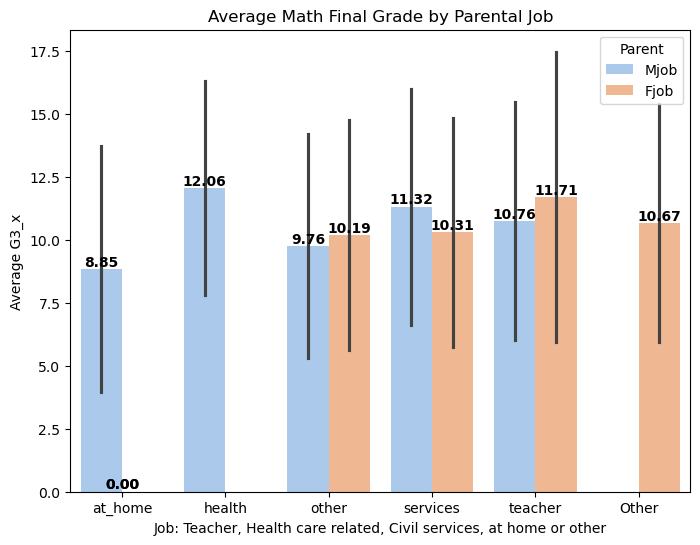

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\3890060346.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(data=parent_long2, x='Job', y='G3_y', hue='Parent', palette='pastel', ci='sd')


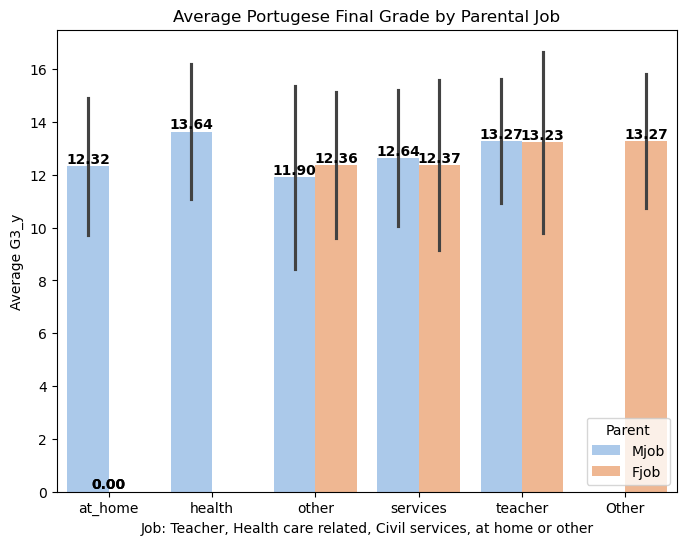

In [146]:
#Does parents Job impact the students final grades?
#1. Math
parent_df = students_all[['Mjob', 'Fjob', 'G3_x']].copy()
parent_long = parent_df.melt(id_vars='G3_x', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long, x='Job', y='G3_x', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Math Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_x")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')

plt.legend(title='Parent')
plt.show()
#2. Portuguese
parent_df2 = students_all[['Mjob', 'Fjob', 'G3_y']].copy()
parent_long2 = parent_df2.melt(id_vars='G3_y', value_vars=['Mjob','Fjob'],
                             var_name='Parent', value_name='Job')
plt.figure(figsize=(8,6))
barplot = sns.barplot(data=parent_long2, x='Job', y='G3_y', hue='Parent', palette='pastel', ci='sd')
plt.title("Average Portugese Final Grade by Parental Job")
plt.xlabel("Job: Teacher, Health care related, Civil services, at home or other")
plt.ylabel("Average G3_y")
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=10, color='black', weight='bold')
plt.legend(title='Parent')
plt.show()

Interpretation: Parents who are at home have a negative impact on students math grades but does not seem to impact Portugese as much. Overall, parental jobs show less impact on student final grades than parental education.

*Engineered Features vs At-Risk Status*. Why? Show how features differ between at-risk and not-at-risk students

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2990812182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_math', y=feature, ax=axes[i], palette='Set2')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2990812182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_math', y=feature, ax=axes[i], palette='Set2')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2990812182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_math', y=feature, ax=ax

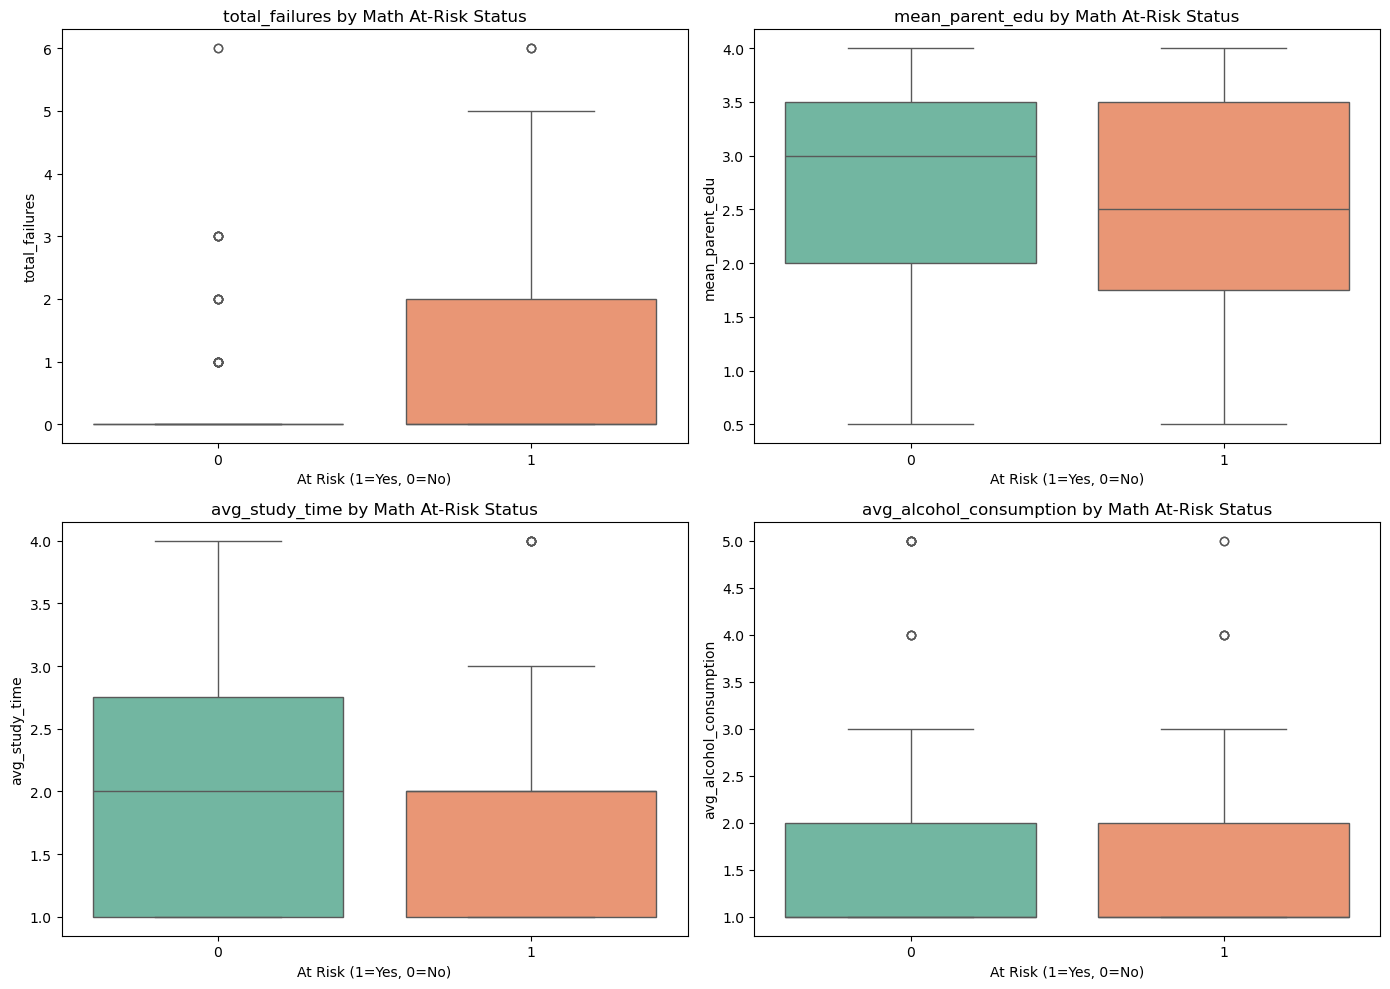

In [147]:
# Box plots for key engineered features
engineered_key = ['total_failures', 'mean_parent_edu', 'avg_study_time', 'avg_alcohol_consumption']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(engineered_key):
    sns.boxplot(data=student_merged, x='at_risk_math', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Math At-Risk Status')
    axes[i].set_xlabel('At Risk (1=Yes, 0=No)')

plt.tight_layout()
plt.show()


- Total Failures STRONGEST PREDICTOR- Past academic failure is the most dramatic predictor of being at-risk. Students who failed before are far more likely to be at-risk now. <br>
- Mean Parental Education MODERATE PREDICTOR- Students whose parents have higher education levels are less likely to be at-risk. Family educational background matters. <br>
- Average Study Time-  WEAK/MODEST PREDICTOR- Study time shows some difference but less dramatic than failures. Not-at-risk students have a slightly wider range (more high-studiers).  The difference is modest: study time alone doesn't strongly separate groups, but it contributes. <br>
- Average Alcohol Consumption WEAK PREDICTOR (at least for math)-  For Math specifically, alcohol consumption shows minimal difference between groups. Both have similar median and spread. <br>

| Feature                 | Separates At-Risk vs Not At-Risk? | Strength   | Key Finding                                            |
| ----------------------- | --------------------------------- | ---------- | ------------------------------------------------------ |
| total_failures          | ✅Very Strong                      | 🔴 High    | At-risk students have significantly more past failures |
| mean_parent_edu         | ✅ Moderate                        | 🟡 Medium  | At-risk students have parents with lower education     |
| avg_study_time          | ⚠️ Weak                           | 🟢 Low     | Slight difference, but overlap is large                |
| avg_alcohol_consumption | ❌ Minimal                         | ⚪ Very Low | Almost no difference for Math at-risk status           |

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\360036355.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_port', y=feature, ax=axes[i], palette='Set2')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\360036355.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_port', y=feature, ax=axes[i], palette='Set2')
C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\360036355.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_merged, x='at_risk_port', y=feature, ax=axes[

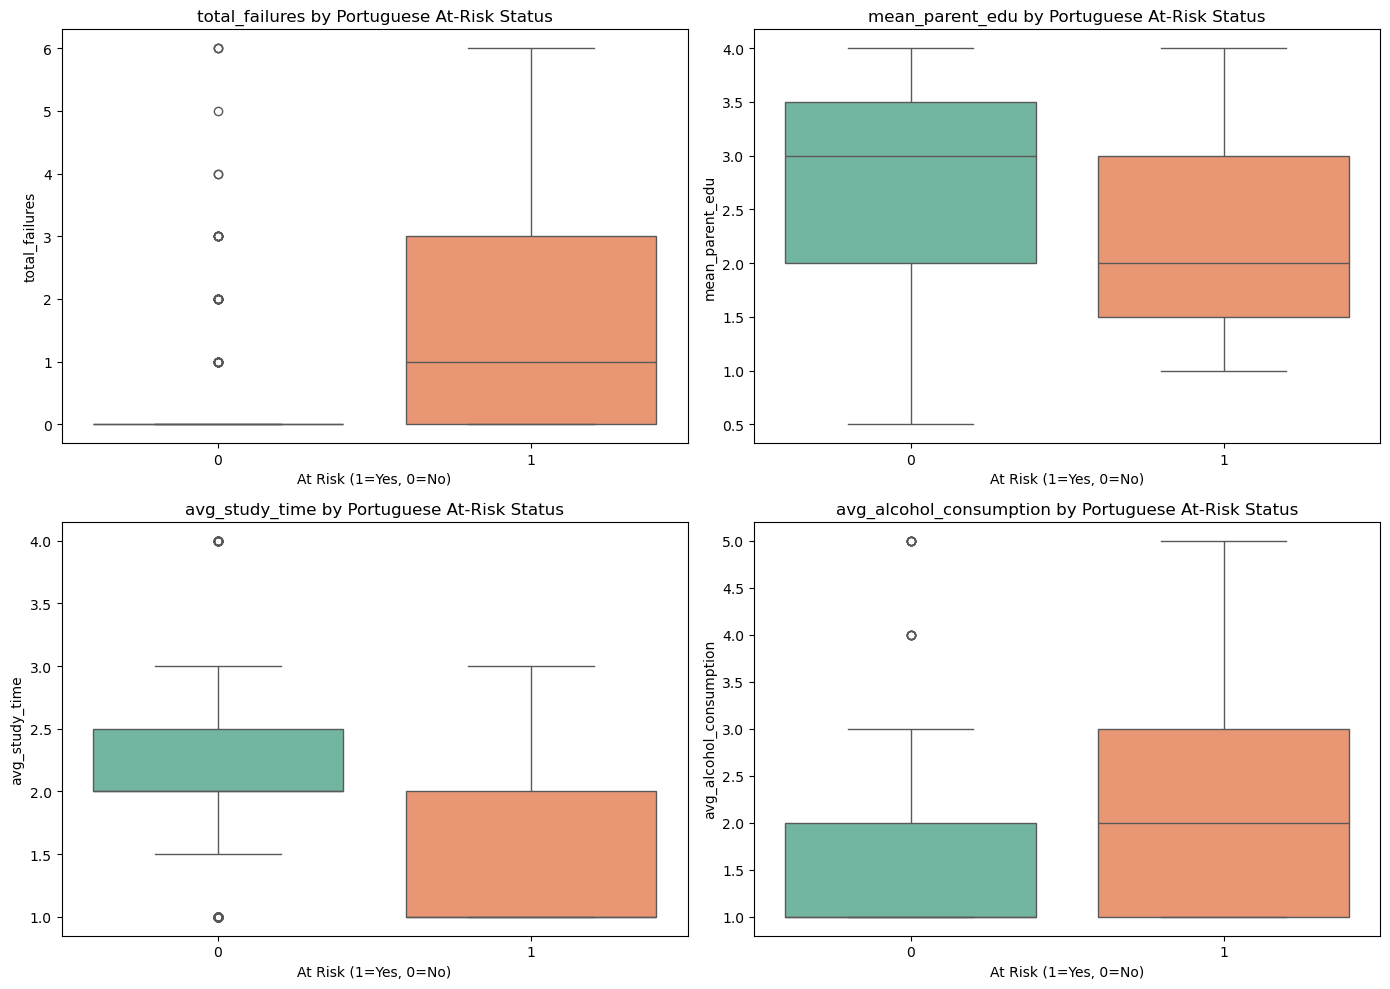

In [148]:
# Box plots for key engineered features
engineered_key = ['total_failures', 'mean_parent_edu', 'avg_study_time', 'avg_alcohol_consumption']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(engineered_key):
    sns.boxplot(data=student_merged, x='at_risk_port', y=feature, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} by Portuguese At-Risk Status')
    axes[i].set_xlabel('At Risk (1=Yes, 0=No)')

plt.tight_layout()
plt.show()


-  Total Failures STRONGEST PREDICTOR (Consistent with Math) <br>
- Mean Parental Education STRONG PREDICTOR. Students with lower parental education are significantly more at-risk in Portuguese. The separation is clearer than in Math <br>
- Average Study Time MODERATE PREDICTOR (Stronger than Math!). Not-at-risk students study slightly more on average. The difference is more visible than in Math.<br>
- Average Alcohol Consumption (Much Stronger than Math!). BIG DIFFERENCE! Alcohol consumption shows much clearer separation for Portuguese than Math. <br>

| Feature                 | Math At-Risk   | Portuguese At-Risk | Key Difference                                                                   |
| ----------------------- | -------------- | ------------------ | -------------------------------------------------------------------------------- |
| total_failures          | 🔴 Very Strong | 🔴 Very Strong     | Similar, failures predict risk in both subjects                                  |
| mean_parent_edu         | 🟡 Moderate    | 🔴 Strong          | Portuguese shows stronger effect– parental education matters more                |
| avg_study_time          | 🟢 Weak        | 🟡 Moderate        | Portuguese shows clearer difference, study time helps more in language           |
| avg_alcohol_consumption | ⚪ Minimal      | 🟡 Moderate        | Portuguese shows much stronger effect, alcohol impacts language performance more |

### Looks like Portuguese is More Sensitive to Behavioral/Social Factors (?)
>Study Habits. Alcohol Use. Parental Support. <br>

### Is Math More Resistant to These Factors? Math performance is more dependent on prior knowledge (failures) and aptitude, less affected by lifestyle/behavioral factors?

*At risk distribution* 

C:\Users\mpari\AppData\Local\Temp\ipykernel_4020\2026975345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_merged, x='at_risk_total', palette='pastel')


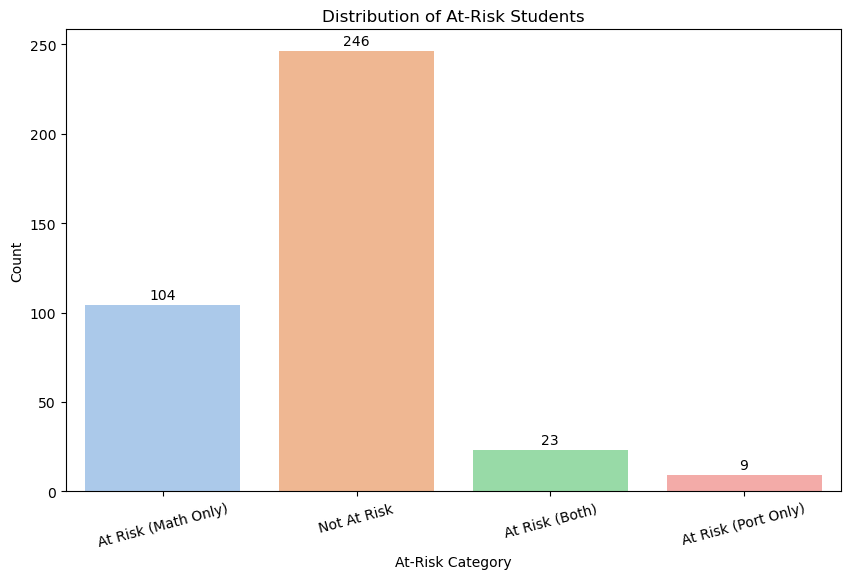

In [149]:
plt.figure(figsize=(10, 6))
sns.countplot(data=student_merged, x='at_risk_total', palette='pastel')
plt.title('Distribution of At-Risk Students')
plt.xlabel('At-Risk Category')
plt.ylabel('Count')
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2., height + 2, 
             f'{int(height)}', ha='center', va='bottom')
plt.xticks(rotation=15)
plt.show()


*Prior Grades (G1, G2) vs Final Grades*

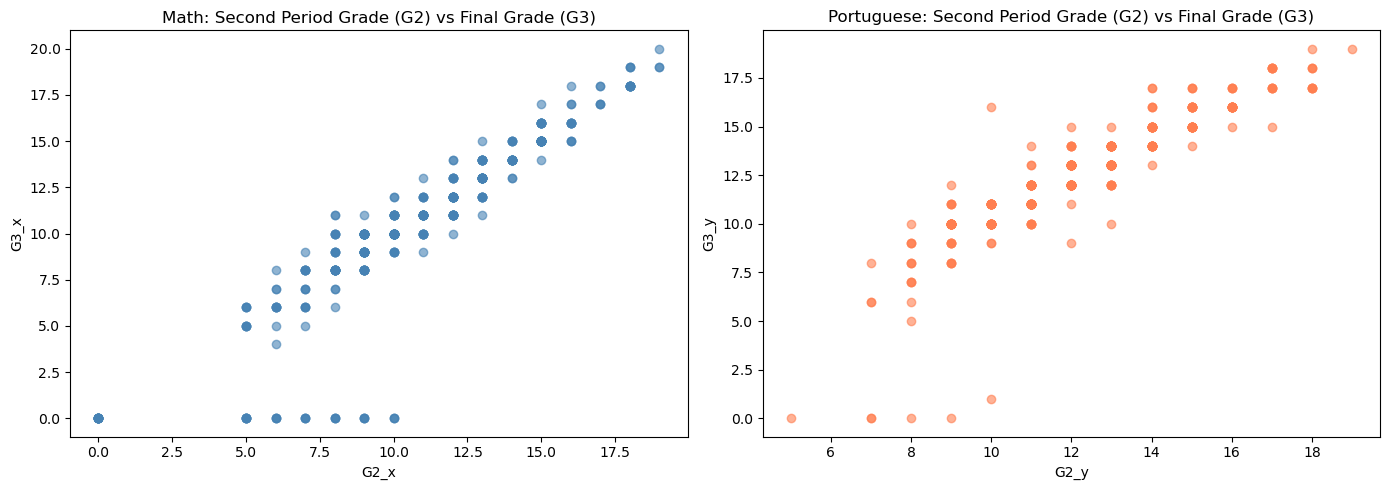

In [150]:
# Scatter plot: G2 vs G3 for both subjects
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Math
axes[0].scatter(student_merged['G2_x'], student_merged['G3_x'], alpha=0.6, color='steelblue')
axes[0].set_title('Math: Second Period Grade (G2) vs Final Grade (G3)')
axes[0].set_xlabel('G2_x')
axes[0].set_ylabel('G3_x')

# Portuguese
axes[1].scatter(student_merged['G2_y'], student_merged['G3_y'], alpha=0.6, color='coral')
axes[1].set_title('Portuguese: Second Period Grade (G2) vs Final Grade (G3)')
axes[1].set_xlabel('G2_y')
axes[1].set_ylabel('G3_y')

plt.tight_layout()
plt.show()


# CREATION OF MASTER DATASETS <br>
1. _Dataset 1_: 
- Includes: All features + G1_x, G2_x, G1_y, G2_y (prior grades)
- Use case: "Best-case scenario" models with all available information
- Users: (K-Means, RF Classifier, RF Regressor)

2. _Dataset 2_: 
- Excludes: G1_x, G2_x, G1_y, G2_y
- Use case: "Early prediction" models simulating beginning of school year
- Users: all 



## One-hot encoding

In [172]:
# Identify remaining categorical columns 
categorical_cols = student_merged.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['at_risk_total']]

print(f"\nCategorical columns to encode: {categorical_cols}")


Categorical columns to encode: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x', 'nursery', 'higher_x', 'internet', 'romantic_x', 'guardian_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y']


In [173]:
# Apply one-hot encoding
if categorical_cols:
    student_encoded = pd.get_dummies(student_merged, columns=categorical_cols, drop_first=True)
else:
    student_encoded = student_merged.copy()

print(f"Encoded dataset shape: {student_encoded.shape}")

Encoded dataset shape: (382, 74)


In [174]:
#Handle at_risk_total encoding separately (too many different options not easily captured by one-hot)
if 'at_risk_total' in student_encoded.columns and student_encoded['at_risk_total'].dtype == 'object':
    student_encoded = pd.get_dummies(student_encoded, columns=['at_risk_total'], drop_first=True)
    print(" Encoded 'at_risk_total' column")

 Encoded 'at_risk_total' column


In [175]:
#Convert boolean columns to integers if any
bool_cols = student_encoded.select_dtypes(include=['bool']).columns
student_encoded[bool_cols] = student_encoded[bool_cols].astype(int)
print(f" Converted {len(bool_cols)} boolean columns to integers")

 Converted 36 boolean columns to integers


In [176]:
non_numeric = student_encoded.select_dtypes(exclude=['int64', 'float64']).columns
if len(non_numeric) == 0:
    print("✅ SUCCESS! All columns are numeric")
else:
    print(f"⚠️ WARNING: Non-numeric columns remain: {list(non_numeric)}")

print(f"\nFinal encoded dataset shape: {student_encoded.shape}")
print(f"Data types: {student_encoded.dtypes.value_counts()}")

✅ SUCCESS! All columns are numeric

Final encoded dataset shape: (382, 76)
Data types: int64      71
float64     5
Name: count, dtype: int64


In [178]:
student_merged_encoded.to_csv('student_merged_encoded.csv', index=False)

### Create Master Datasets

In [179]:
# WITH prior grades
student_with_grades = student_encoded.copy()
student_with_grades.to_csv('student_with_grades_encoded.csv', index=False)
print("Saved: student_with_grades_encoded.csv")
print(f"   Shape: {student_with_grades.shape}")

Saved: student_with_grades_encoded.csv
   Shape: (382, 76)


In [180]:
# WITHOUT prior grades
prior_grade_cols = ['G1_x', 'G2_x', 'G1_y', 'G2_y']
student_without_grades = student_encoded.drop(columns=prior_grade_cols, errors='ignore')
student_without_grades.to_csv('student_without_grades_encoded.csv', index=False)
print(" Saved: student_without_grades_encoded.csv")
print(f"   Shape: {student_without_grades.shape}")

 Saved: student_without_grades_encoded.csv
   Shape: (382, 72)
